## Test of inputs from ATHENA Delphes fast simulation

Code from Miguel Arratia adapted

https://github.com/miguelignacio/calostudies/blob/main/h1sim.ipynb


In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
import os

from os import listdir


import uproot3


rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

#import mplhep as hep
#hep.set_style(hep.style.ROOT)
print(pd.__version__)

/Users/owen/.pyenv/versions/3.8.1/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


1.2.5


In [2]:
# Define default plot styles
plot_style_0 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'linestyle': '--',
    'density': True
}

plot_style_1 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': True
}

plot_style_2 = {'alpha': 0.5, 'density': True}

plot_style_1A = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': False
}

plot_style_2A = {'alpha': 0.5, 'density': False}



In [3]:
temp_file = uproot3.open('mini-tree.root')
print (temp_file.keys()) 
temp_tree = temp_file['minitree']
print(temp_tree)
mc   =  temp_tree.pandas.df(["Q2*","gen_Q2","y*","HFS*",'gen_y',"e_*","gene*",'Empz','pth','gen_s'], entrystop=3e7,flatten=True)
mc

[b'minitree;1']
<TTree b'minitree' at 0x00010d3eda00>


,Q2_e,Q2_sigma,Q2_esigma,Q2_da,Q2_h,gen_Q2,y_e,y_sigma,y_esigma,y_da,...,gen_y,e_px,e_py,e_pz,gene_px,gene_py,gene_pz,Empz,pth,gen_s
entry,,,,,,,,,,,,,,,,,,,,,
0,306.342438,311.885742,306.342438,303.058350,333.535645,295.325317,0.221498,0.235335,0.231152,0.229844,...,0.249496,-15.433936,-0.530815,999.000000,-14.878879,-0.511726,-9.407311,36.651375,15.925537,19800.000000
1,434.801697,414.441711,434.801697,456.054047,408.404755,446.976654,0.247774,0.210820,0.221176,0.211006,...,0.226711,3.317768,-17.778124,-11.427691,3.410671,-18.275932,-7.711158,34.314190,18.064793,19800.000000
2,300.874756,286.983246,300.874756,318.127411,368.090637,317.278534,0.114154,0.071275,0.074725,0.063359,...,0.065858,-16.079279,2.825834,-6.771391,-16.955927,2.979900,-12.407797,34.337681,18.522051,19800.000000
3,286.881622,266.185211,286.881622,268.020844,124.872551,279.580505,0.402201,0.355721,0.383379,0.441503,...,0.417415,-2.050560,-12.934172,-9.438368,-1.998374,-12.604998,-6.603460,33.402840,9.146439,19800.000000
4,376.005249,384.289581,376.005249,366.472321,366.212372,365.690094,0.129035,0.147811,0.144624,0.151117,...,0.152929,-7.226972,-16.590910,-9.363446,-7.028710,-16.135761,-10.168201,36.793072,17.632061,19800.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84647,481.445892,405.495972,481.445892,485.386902,180.836807,507.619263,0.516860,0.426367,0.506226,0.512905,...,0.490594,-3.361445,-14.876377,-2.040251,-3.544187,-15.685116,-2.119016,30.320826,10.765558,19799.998047
84648,222.741486,207.968079,222.741486,238.660202,207.691574,236.082504,0.172068,0.113254,0.121299,0.112898,...,0.122479,7.336633,11.427540,-1.789498,7.776057,12.111986,-12.516412,33.612217,13.628270,19800.001953
84649,544.896912,455.584595,544.896912,641.272095,244.961884,551.439514,0.856147,0.827946,0.990256,0.830704,...,0.854420,-2.960256,8.343970,-7.699022,-2.995800,8.444158,5.038448,30.099337,8.682704,19800.000000


In [4]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [5]:
def applyCutsJets(df,isMC=False):
    temp = df
    #temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp.eval('e_pt = sqrt(e_px*e_px + e_py*e_py)',inplace=True)
    temp.eval('e_phi = arctan(e_py/e_px)', inplace=True)
    temp.eval('logQ2_e= log(Q2_e)/2.3025850', inplace=True)
    temp.eval('logQ2_esigma= log(Q2_esigma)/2.3025850', inplace=True)
    temp.eval('logQ2_sigma= log(Q2_sigma)/2.3025850', inplace=True)
    temp.eval('logQ2_da= log(Q2_da)/2.3025850', inplace=True)

    #-- use s from the input file 
    temp.eval('s = gen_s', inplace=True)
    
    temp.eval('x_e = Q2_e/(s*y_e)',inplace=True)
    temp.eval('x_da = Q2_da/(s*y_da)',inplace=True)
    temp.eval('x_sigma = Q2_sigma/(s*y_sigma)',inplace=True)
    temp.eval('x_esigma = x_sigma',inplace=True)


    ######temp = applyCut(temp, 'pass_reco==0 | ptmiss < 10', 'ptmiss<10')

    #temp = applyCut(temp, 'pass_reco==0 | 0.08 < y_e < 0.7', '0.08 < y_e < 0.7')
    #temp = applyCut(temp, 'pass_reco==0 | Q2_e>150', 'Q2_e>150')
    
    #-- H1 cuts (Ebeam = 27.6)
    #temp = applyCut(temp, 'pass_reco==0 | Empz<65', 'Empz<65')    
    #temp = applyCut(temp, 'pass_reco==0 | Empz>45', 'Empz>45')

    #-- Athena cuts (Ebeam = 18)
    temp = applyCut(temp, 'pass_reco==0 | Empz<42', 'Empz<42')    
    temp = applyCut(temp, 'pass_reco==0 | Empz>29', 'Empz>29')


   
    if(isMC):
        temp = applyCut(temp,'pass_truth>0',' pass_truth>0')
        temp = applyCut(temp,'gen_Q2>150',' gen_Q2>150')
        temp.eval('gen_x= gen_Q2/(s*gen_y)', inplace=True)   

        temp.eval('gen_logQ2= log(gen_Q2)/2.3025850', inplace=True)   
        temp.eval('gene_pt = sqrt(gene_px*gene_px + gene_py*gene_py)',inplace=True)
        
        temp.eval('yda_ratio = y_da/gen_y',inplace=True)
        temp.eval('ysigma_ratio = y_sigma/gen_y',inplace=True)
        temp.eval('yesigma_ratio = y_esigma/gen_y',inplace=True)
        temp.eval('ye_ratio = y_e/gen_y',inplace=True)
        
        temp.eval('Q2e_ratio = Q2_e/gen_Q2',inplace=True)
        temp.eval('Q2da_ratio = Q2_da/gen_Q2',inplace=True)
        temp.eval('Q2sigma_ratio = Q2_sigma/gen_Q2',inplace=True)
        temp.eval('Q2esigma_ratio = Q2_esigma/gen_Q2',inplace=True)
        
        temp.eval('xe_ratio = x_e/gen_x',inplace=True)
        temp.eval('xda_ratio = x_da/gen_x',inplace=True)
        temp.eval('xsigma_ratio = x_sigma/gen_x',inplace=True)
        temp.eval('xesigma_ratio = x_esigma/gen_x',inplace=True)
        
        

    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

In [6]:
mc.keys()

Index(['Q2_e', 'Q2_sigma', 'Q2_esigma', 'Q2_da', 'Q2_h', 'gen_Q2', 'y_e',
       'y_sigma', 'y_esigma', 'y_da', 'y_h', 'HFS_px', 'HFS_py', 'HFS_pz',
       'HFS_E', 'gen_y', 'e_px', 'e_py', 'e_pz', 'gene_px', 'gene_py',
       'gene_pz', 'Empz', 'pth', 'gen_s'],
      dtype='object')

In [7]:
%%time 
mc['pass_reco'] = np.where(mc['Q2_e']>0, 1, 0)
mc['pass_truth'] = np.where(mc['gen_Q2']>0, 1, 0)



CPU times: user 3.98 ms, sys: 1.99 ms, total: 5.96 ms
Wall time: 5.24 ms


In [8]:
%%time 
print('Selecting MC events\n')
mc   = applyCutsJets(mc, isMC=True)

Selecting MC events

Empz<42 83232  fraction kept: 98.3
Empz>29 80113  fraction kept: 96.3
 pass_truth>0 80113  fraction kept: 100.0
 gen_Q2>150 80113  fraction kept: 100.0
CPU times: user 126 ms, sys: 24.2 ms, total: 150 ms
Wall time: 148 ms


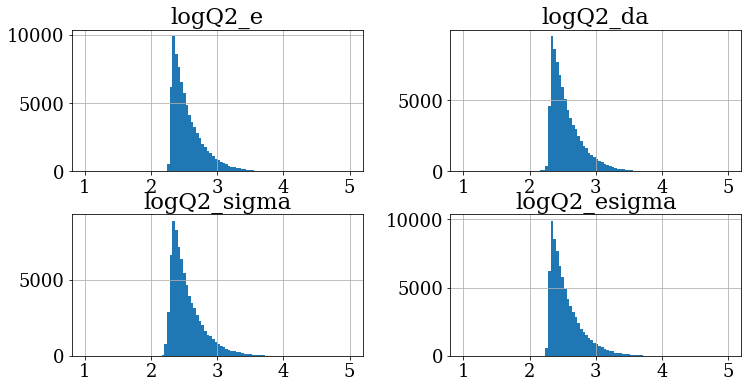

In [9]:
mc.query('pass_reco>0').hist(figsize=(12,6),bins=100,column=['logQ2_e','logQ2_da','logQ2_sigma','logQ2_esigma'],range=(1,5))
plt.show()

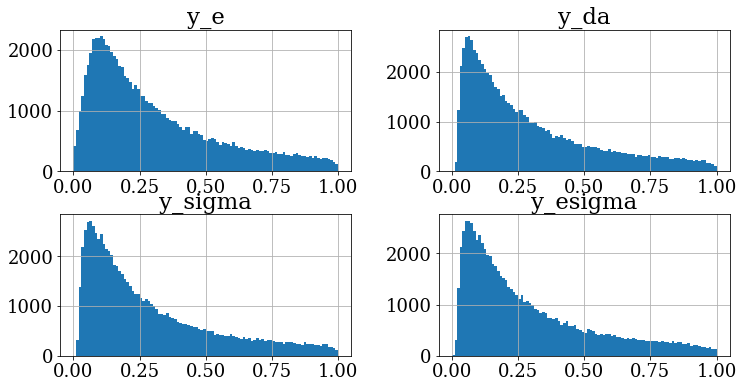

In [10]:
mc.query('pass_reco>0').hist(figsize=(12,6),bins=100,column=['y_e','y_da','y_sigma','y_esigma'],range=(0,1))
plt.show()

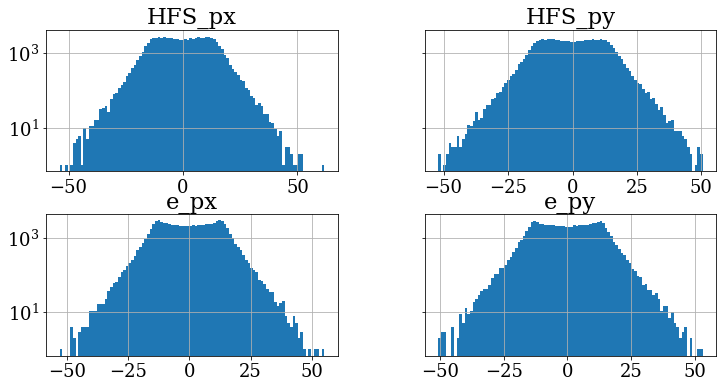

In [11]:
mc.query('pass_reco>0').hist(figsize=(12,6),bins=100,column=['HFS_px','HFS_py','e_px','e_py'],sharey=True)
plt.yscale('log')

plt.show()

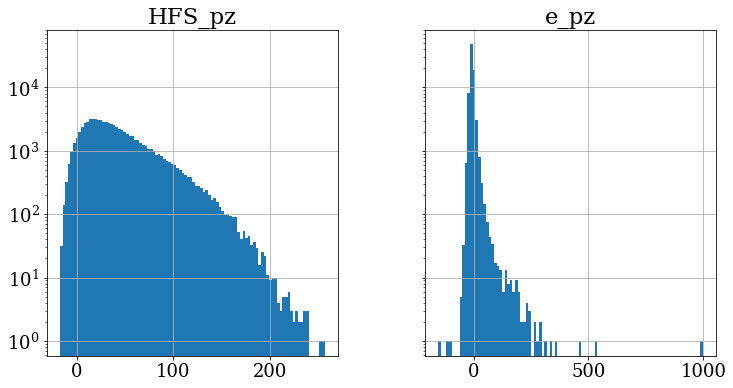

In [12]:
mc.query('pass_reco>0').hist(figsize=(12,6),bins=100,column=['HFS_pz','e_pz'],sharey=True)
plt.yscale('log')
plt.show()

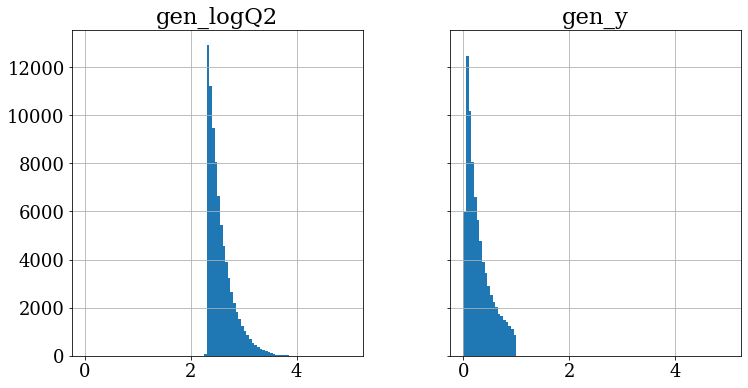

In [13]:
mc.query('pass_reco>0').hist(figsize=(12,6),bins=100,column=['gen_logQ2','gen_y'],range=(0,5),sharey=True)
plt.show()

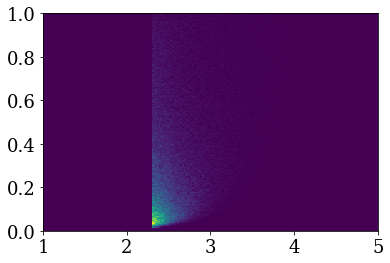

In [14]:
plt.hist2d(mc['gen_logQ2'],mc['gen_y'],range=([1,5],[0,1]),bins=200)
plt.show()

In [15]:
mc.eval('yda_ratio = y_da/gen_y',inplace=True)
mc.eval('ysigma_ratio = y_sigma/gen_y',inplace=True)
mc.eval('yesigma_ratio = y_esigma/gen_y',inplace=True)
mc.eval('ye_ratio = y_e/gen_y',inplace=True)


mc.eval('Q2da_ratio = Q2_da/gen_Q2',inplace=True)
mc.eval('Q2sigma_ratio = Q2_sigma/gen_Q2',inplace=True)
mc.eval('Q2esigma_ratio = Q2_esigma/gen_Q2',inplace=True)

mc.eval('Q2e_ratio = Q2_e/gen_Q2',inplace=True)

['gen_y>0.5 and gen_y<0.8' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.8
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


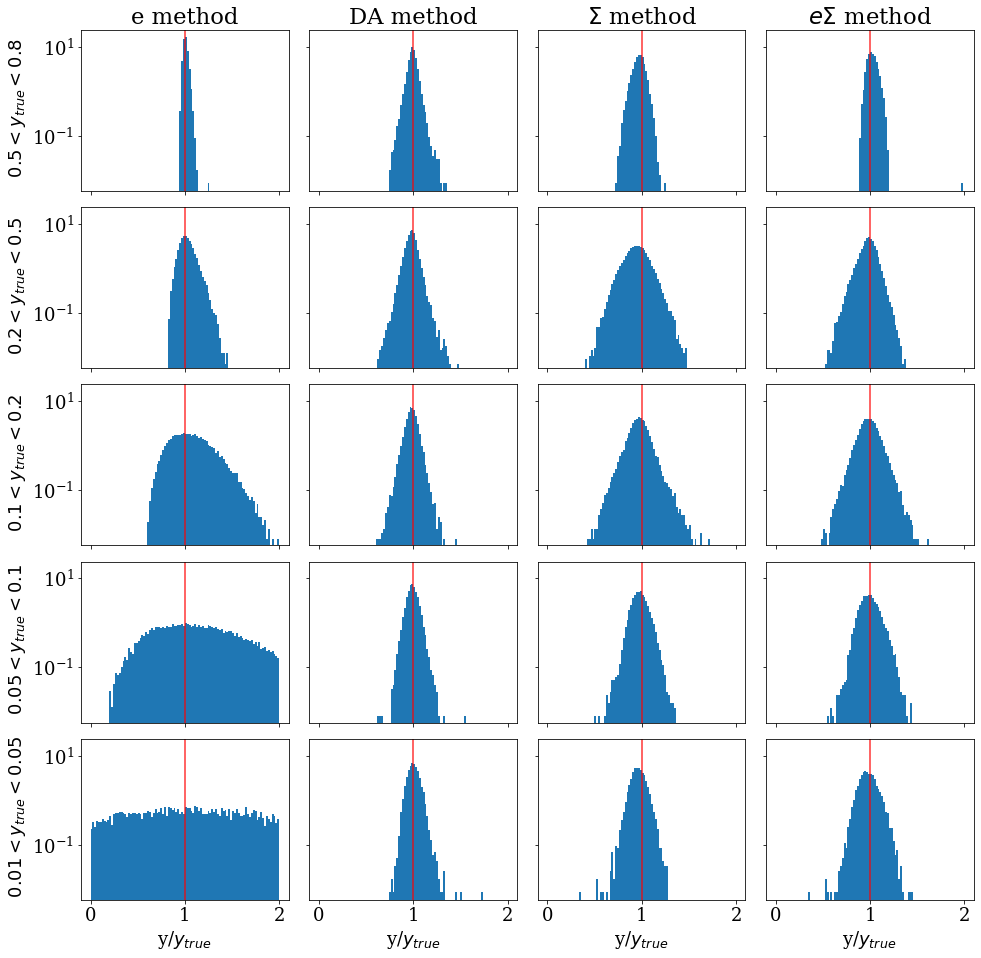

In [16]:
fig,ax = plt.subplots(5,4,figsize=(16,16),sharey=True,sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.8', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)



for i in range(5):
    print(ybins[i])
    ax[0 + 4*i].hist(mc.query(ybins[i] + ' and pass_reco>0')['ye_ratio'],density=True,bins=100,range=(0,2),label='e method')
    ax[1 + 4*i].hist(mc.query(ybins[i]+ ' and pass_reco>0')['yda_ratio'],density=True,bins=100,range=(0,2),label='DA method')
    ax[2 + 4*i].hist(mc.query(ybins[i]+ ' and pass_reco>0')['ysigma_ratio'],density=True,bins=100,range=(0,2),label='$\Sigma$ method')
    ax[3 + 4*i].hist(mc.query(ybins[i]+ ' and pass_reco>0')['yesigma_ratio'],density=True,bins=100,range=(0,2),label='$e-\Sigma$ method')

for i in range(len(ax.flatten())):
    ax[i].axvline(1.0,color='red',lw=2,alpha=0.6)
#ax[1].set_title(r"$\bf{ATHENA}$"+' full simulation [DD4hep] \n Pythia8+Geant4, NC DIS 18x275 GeV, $Q^{2}>100$ GeV$^{2}$',fontsize=29)
    ax[i].set_xticks([],minor=True)
    ax[i].set_yticks([], minor=True)
    ax[i].set_yscale('log')
    # for minor ticks
    #ax[i].set_xticks([], minor=True)

plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[0].set_title('e method')
ax[1].set_title('DA method')
ax[2].set_title('$\Sigma$ method')
ax[3].set_title('$e\Sigma$ method')


ax[0].set_ylabel(' $0.5<y_{true}<0.8$')
ax[4].set_ylabel(' $0.2<y_{true}<0.5$')
ax[8].set_ylabel(' $0.1<y_{true}<0.2$')
ax[12].set_ylabel(' $0.05<y_{true}<0.1$')
ax[16].set_ylabel(' $0.01<y_{true}<0.05$')
ax[-1].set_xlabel(r'y/$y_{true}$ ')

ax[-2].set_xlabel(r'y/$y_{true}$ ')
ax[-3].set_xlabel(r'y/$y_{true}$ ')
ax[-4].set_xlabel(r'y/$y_{true}$ ')


plt.show()

['gen_y>0.5 and gen_y<0.8' 'gen_y>0.2 and gen_y<0.5'
 'gen_y>0.1 and gen_y<0.2' 'gen_y>0.05 and gen_y<0.1'
 'gen_y>0.01 and gen_y<0.05']
gen_y>0.5 and gen_y<0.8
gen_y>0.2 and gen_y<0.5
gen_y>0.1 and gen_y<0.2
gen_y>0.05 and gen_y<0.1
gen_y>0.01 and gen_y<0.05


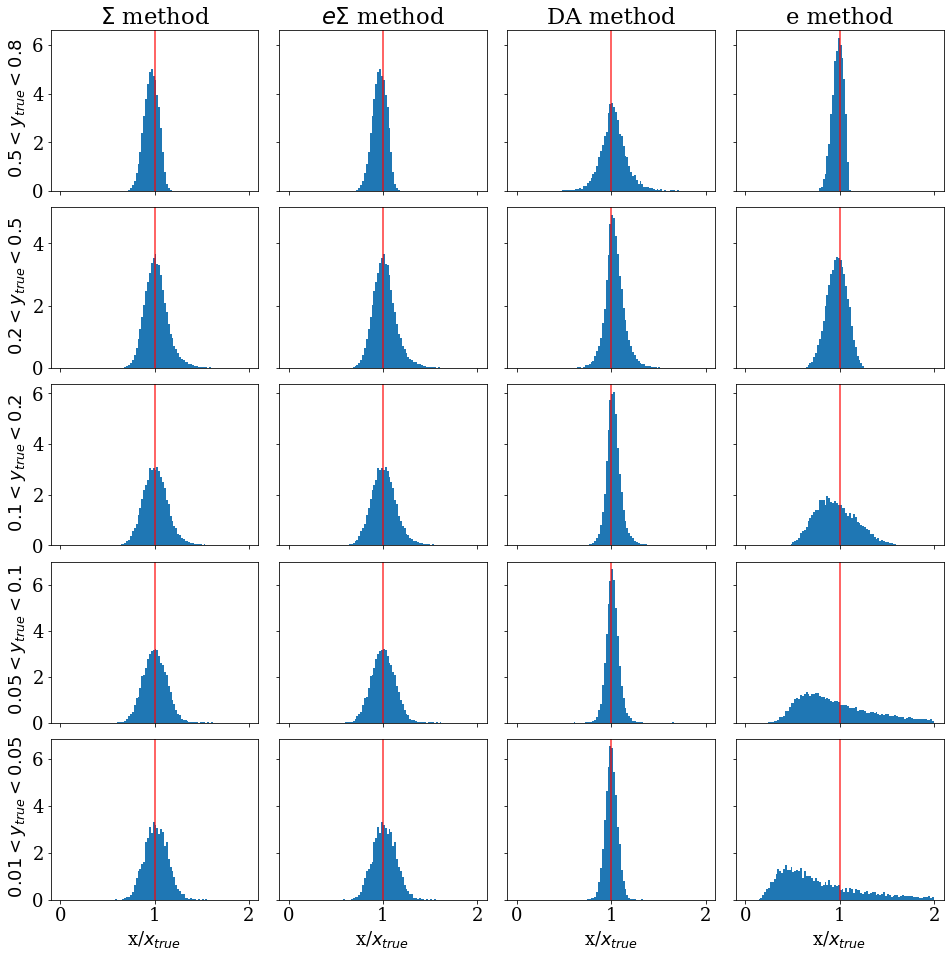

In [17]:
fig,ax = plt.subplots(5,4,figsize=(16,16),sharey='row',sharex=True)
ax = ax.flatten()
ybins = np.array(['gen_y>0.5 and gen_y<0.8', 'gen_y>0.2 and gen_y<0.5',
                  'gen_y>0.1 and gen_y<0.2', 'gen_y>0.05 and gen_y<0.1','gen_y>0.01 and gen_y<0.05'])
print(ybins)



for i in range(5):
    print(ybins[i])
    ax[0 + 4*i].hist(mc.query(ybins[i] + ' and pass_reco>0')['xsigma_ratio'],density=True,bins=100,range=(0,2))
    ax[1 + 4*i].hist(mc.query(ybins[i]+ ' and pass_reco>0')['xesigma_ratio'],density=True,bins=100,range=(0,2))
    ax[2 + 4*i].hist(mc.query(ybins[i]+ ' and pass_reco>0')['xda_ratio'],density=True,bins=100,range=(0,2))
    ax[3 + 4*i].hist(mc.query(ybins[i]+ ' and pass_reco>0')['xe_ratio'],density=True,bins=100,range=(0,2))

for i in range(len(ax.flatten())):
    ax[i].axvline(1.0,color='red',lw=2,alpha=0.6)
#ax[1].set_title(r"$\bf{ATHENA}$"+' full simulation [DD4hep] \n Pythia8+Geant4, NC DIS 18x275 GeV, $Q^{2}>100$ GeV$^{2}$',fontsize=29)
    ax[i].set_xticks([],minor=True)
    ax[i].set_yticks([], minor=True)
    #ax[i].set_yscale('log')
    # for minor ticks
    #ax[i].set_xticks([], minor=True)

plt.subplots_adjust(wspace=0.1, hspace=0.1)

ax[3].set_title('e method')
ax[2].set_title('DA method')
ax[0].set_title('$\Sigma$ method')
ax[1].set_title('$e\Sigma$ method')


ax[0].set_ylabel(' $0.5<y_{true}<0.8$')
ax[4].set_ylabel(' $0.2<y_{true}<0.5$')
ax[8].set_ylabel(' $0.1<y_{true}<0.2$')
ax[12].set_ylabel(' $0.05<y_{true}<0.1$')
ax[16].set_ylabel(' $0.01<y_{true}<0.05$')
ax[-1].set_xlabel(r'x/$x_{true}$ ')

ax[-2].set_xlabel(r'x/$x_{true}$ ')
ax[-3].set_xlabel(r'x/$x_{true}$ ')
ax[-4].set_xlabel(r'x/$x_{true}$ ')


plt.show()